# Combining Three Datasets into One

### Imports

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from io import StringIO


## Load the Three Datasets

In [2]:
# Load the cleaned datasets from S3
# Load cust_seg_df from S3
custseg_trans = pd.read_csv('resource/custseg_clean.csv')

# Load markcamp_clean from S3
markcamp_trans = pd.read_csv('resource/markcamp_clean.csv')

# Load onlineretal_clean from S3
onlineretail_trans = pd.read_csv('resource/onlineretail_clean.csv')

## Combine datasets

In [3]:
# Combine the datasets
customerinfo_df = pd.merge(custseg_trans, markcamp_trans, on='CustomerID', how='inner')

In [4]:
# Perform inner merge based on 'CustomerID'
customer_sales_df = pd.merge(customerinfo_df, onlineretail_trans, on='CustomerID', how='inner')

## Data Cleaning/Scrubbing

In [5]:
customer_sales_df.head(10)

,CustomerID,first_name,last_name,title,gender,email,company_name,department,job_title,job_category,...,time_zone,ip_address,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,1523,Jarib,Brogini,Mrs,Female,jbroginih@narod.ru,Camido,Services,Civil Engineer,Engineering,...,Europe/Lisbon,15.83.166.25,536401,20961,STRAWBERRY BATH SPONGE,1,2010-12-01 11:21:00,1.25,United Kingdom,1.25
1,1523,Jarib,Brogini,Mrs,Female,jbroginih@narod.ru,Camido,Services,Civil Engineer,Engineering,...,Europe/Lisbon,15.83.166.25,536488,21577,SAVE THE PLANET COTTON TOTE BAG,1,2010-12-01 12:31:00,2.25,United Kingdom,2.25
2,1523,Jarib,Brogini,Mrs,Female,jbroginih@narod.ru,Camido,Services,Civil Engineer,Engineering,...,Europe/Lisbon,15.83.166.25,536601,22633,HAND WARMER UNION JACK,6,2010-12-02 08:33:00,1.85,United Kingdom,11.10
3,1523,Jarib,Brogini,Mrs,Female,jbroginih@narod.ru,Camido,Services,Civil Engineer,Engineering,...,Europe/Lisbon,15.83.166.25,536874,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2010-12-03 11:35:00,3.75,United Kingdom,3.75
4,1523,Jarib,Brogini,Mrs,Female,jbroginih@narod.ru,Camido,Services,Civil Engineer,Engineering,...,Europe/Lisbon,15.83.166.25,537153,22816,CARD MOTORBIKE SANTA,48,2010-12-05 13:03:00,0.42,United Kingdom,20.16
5,1523,Jarib,Brogini,Mrs,Female,jbroginih@narod.ru,Camido,Services,Civil Engineer,Engineering,...,Europe/Lisbon,15.83.166.25,537155,21544,SKULLS WATER TRANSFER TATTOOS,1,2010-12-05 13:05:00,0.85,United Kingdom,0.85
6,1523,Jarib,Brogini,Mrs,Female,jbroginih@narod.ru,Camido,Services,Civil Engineer,Engineering,...,Europe/Lisbon,15.83.166.25,537225,85049E,SCANDINAVIAN REDS RIBBONS,1,2010-12-05 16:41:00,1.25,United Kingdom,1.25
7,1523,Jarib,Brogini,Mrs,Female,jbroginih@narod.ru,Camido,Services,Civil Engineer,Engineering,...,Europe/Lisbon,15.83.166.25,537362,48173C,DOORMAT BLACK FLOCK,1,2010-12-06 12:34:00,7.95,United Kingdom,7.95
8,1523,Jarib,Brogini,Mrs,Female,jbroginih@narod.ru,Camido,Services,Civil Engineer,Engineering,...,Europe/Lisbon,15.83.166.25,538862,21481,FAWN BLUE HOT WATER BOTTLE,2,2010-12-14 14:11:00,2.95,United Kingdom,5.90
9,1523,Jarib,Brogini,Mrs,Female,jbroginih@narod.ru,Camido,Services,Civil Engineer,Engineering,...,Europe/Lisbon,15.83.166.25,540364,22743,MAKE YOUR OWN FLOWERPOWER CARD KIT,1,2011-01-06 16:03:00,2.95,United Kingdom,2.95


In [6]:
customer_sales_df.dtypes

CustomerID          int64
first_name         object
last_name          object
title              object
gender             object
email              object
company_name       object
department         object
job_title          object
job_category       object
language           object
university         object
linkedin_skill     object
Education          object
Income              int64
Kidhome             int64
Marital_Status     object
Teenhome            int64
Year_Birth          int64
city               object
country            object
country_code       object
region             object
latitude          float64
longitude         float64
phone              object
street_address     object
street_name        object
street_number       int64
street_suffix      object
time_zone          object
ip_address         object
InvoiceNo          object
StockCode          object
Description        object
Quantity            int64
InvoiceDate        object
UnitPrice         float64
Country     

In [7]:
# Check unique values in each column
unique_counts = customer_sales_df.nunique()
print(unique_counts)

CustomerID         2216
first_name         1931
last_name          2177
title                 6
gender                8
email              2216
company_name        382
department           12
job_title           194
job_category         22
language             97
university         1638
linkedin_skill     1859
Education             5
Income             2213
Kidhome               3
Marital_Status        8
Teenhome              3
Year_Birth           57
city               2101
country             161
country_code        161
region                7
latitude           2137
longitude          2134
phone              2216
street_address     2216
street_name         496
street_number      1258
street_suffix        21
time_zone           220
ip_address         2216
InvoiceNo         22190
StockCode          3684
Description        3896
Quantity            436
InvoiceDate       20460
UnitPrice           620
Country              37
TotalPrice         3878
dtype: int64


### Handle Missing values

In [8]:
# Check missing values
missing_counts = customer_sales_df.isnull().sum()
print(missing_counts)

CustomerID           0
first_name           0
last_name            0
title                0
gender               0
email                0
company_name         0
department           0
job_title            0
job_category      4574
language             0
university           0
linkedin_skill       0
Education            0
Income               0
Kidhome              0
Marital_Status       0
Teenhome             0
Year_Birth           0
city                 0
country              0
country_code         0
region               0
latitude             0
longitude            0
phone                0
street_address       0
street_name          0
street_number        0
street_suffix        0
time_zone            0
ip_address           0
InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
Country              0
TotalPrice           0
dtype: int64


In [9]:
# Filter the dataframe where 'job_category' is blank
blank_job_category_df = customer_sales_df[customer_sales_df['job_category'].isnull()]

# Extract the unique values of 'job_title' from the filtered dataframe
unique_job_titles = blank_job_category_df['job_title'].unique()

# Print the unique job titles
print(unique_job_titles)

['Nurse Practicioner']


In [10]:
# Fill the blank 'job_category' with 'Medical' where 'job_title' is 'Nurse Practicioner'
customer_sales_df.loc[customer_sales_df['job_title'] == 'Nurse Practicioner', 'job_category'] = customer_sales_df['job_category'].fillna('Healthcare')


In [11]:
# Check missing values
missing_counts = customer_sales_df.isnull().sum()
print(missing_counts)

CustomerID        0
first_name        0
last_name         0
title             0
gender            0
email             0
company_name      0
department        0
job_title         0
job_category      0
language          0
university        0
linkedin_skill    0
Education         0
Income            0
Kidhome           0
Marital_Status    0
Teenhome          0
Year_Birth        0
city              0
country           0
country_code      0
region            0
latitude          0
longitude         0
phone             0
street_address    0
street_name       0
street_number     0
street_suffix     0
time_zone         0
ip_address        0
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
TotalPrice        0
dtype: int64


### Check for Duplicate Rows

In [12]:
# Check for true duplicate rows in the DataFrame based on all columns
duplicate_rows = customer_sales_df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Retrieve the duplicate rows
duplicate_data = customer_sales_df[duplicate_rows]

# Display the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 0


In [13]:
# Remove the duplicate row(s) from the DataFrame
customer_sales_df = customer_sales_df.drop_duplicates()

# Check dataset
customer_sales_df.shape

(406829, 40)

## Feature Creation

### Create 'Purchase_Frequency' Column

In [14]:
# Convert 'InvoiceDate' to datetime if it's not already in datetime format
customer_sales_df['InvoiceDate'] = pd.to_datetime(customer_sales_df['InvoiceDate'])

# Calculate purchase frequency using 'InvoiceNo'
purchase_frequency = customer_sales_df.groupby('CustomerID')['InvoiceNo'].nunique().rename('Purchase_Frequency')

# Merge the purchase frequency calculation based on 'InvoiceNo' directly into customer_sales_df
customer_sales_df = pd.merge(customer_sales_df, purchase_frequency, on='CustomerID', how='left')

In [15]:
# Describe the 'Purchase_Frequency' column to get statistics including min, max, and quartiles
purchase_frequency_description = customer_sales_df['Purchase_Frequency'].describe()

# Extract relevant statistics
purchase_frequency_min = purchase_frequency_description['min']
purchase_frequency_max = purchase_frequency_description['max']
purchase_frequency_quartiles = purchase_frequency_description[['25%', '50%', '75%']]

# Display the results
print("Minimum Purchase Frequency:", purchase_frequency_min)
print("Maximum Purchase Frequency:", purchase_frequency_max)
print("Purchase Frequency Quartiles:")
print(purchase_frequency_quartiles)


Minimum Purchase Frequency: 129.0
Maximum Purchase Frequency: 234.0
Purchase Frequency Quartiles:
25%    174.0
50%    182.0
75%    192.0
Name: Purchase_Frequency, dtype: float64


### Check for Central Tendancy and Outliers

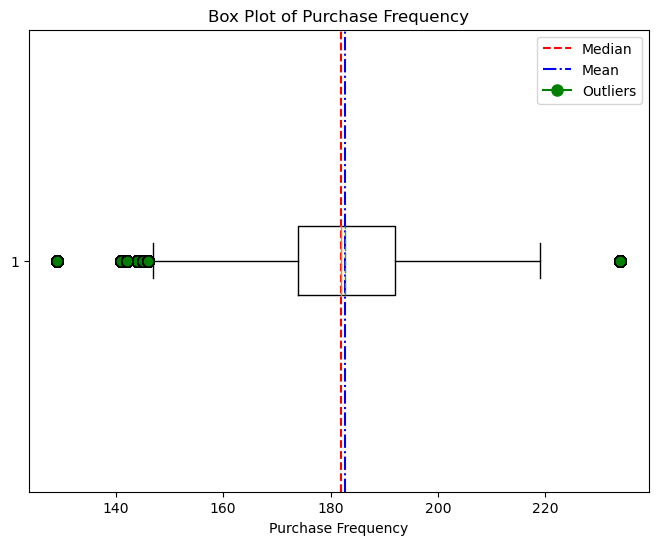

In [16]:
# Calculate mean and median
purchase_frequency_mean = customer_sales_df['Purchase_Frequency'].mean()
purchase_frequency_median = customer_sales_df['Purchase_Frequency'].median()

# Create a box plot for 'Purchase_Frequency' with mean, median, and outliers
plt.figure(figsize=(8, 6))
box = plt.boxplot(customer_sales_df['Purchase_Frequency'], vert=False, showmeans=True, 
                  meanline=True, showcaps=True, showbox=True, flierprops=dict(marker='o', markerfacecolor='g', markersize=8))
plt.axvline(purchase_frequency_median, color='r', linestyle='--', label='Median')
plt.axvline(purchase_frequency_mean, color='blue', linestyle='-.', label='Mean')

# Create custom legend entries for mean, median, and outliers
legend_entries = [plt.Line2D([0], [0], color='r', linestyle='--', label='Median'),
                  plt.Line2D([0], [0], color='blue', linestyle='-.', label='Mean'),
                  plt.Line2D([0], [0], marker='o', color='green', label='Outliers', markerfacecolor='green', markersize=8)]
plt.legend(handles=legend_entries)

plt.title('Box Plot of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.show()

### Create 'Age' Column

In [17]:
# Calculate age from 'Year_Birth'
current_year = pd.Timestamp.now().year
customer_sales_df['Age'] = current_year - customer_sales_df['Year_Birth']

In [18]:
# Describe the 'Age' column to get statistics including min, max, and quartiles
age_description = customer_sales_df['Age'].describe()

# Extract relevant statistics
age_min = age_description['min']
age_max = age_description['max']
age_quartiles = age_description[['25%', '50%', '75%']]

# Display the results
print("Minimum age:", age_min)
print("Maximum age:", age_max)
print("Age Quartiles:")
print(age_quartiles)


Minimum age: 28.0
Maximum age: 84.0
Age Quartiles:
25%    42.0
50%    56.0
75%    70.0
Name: Age, dtype: float64


### Check for Central Tendancy and Outliers

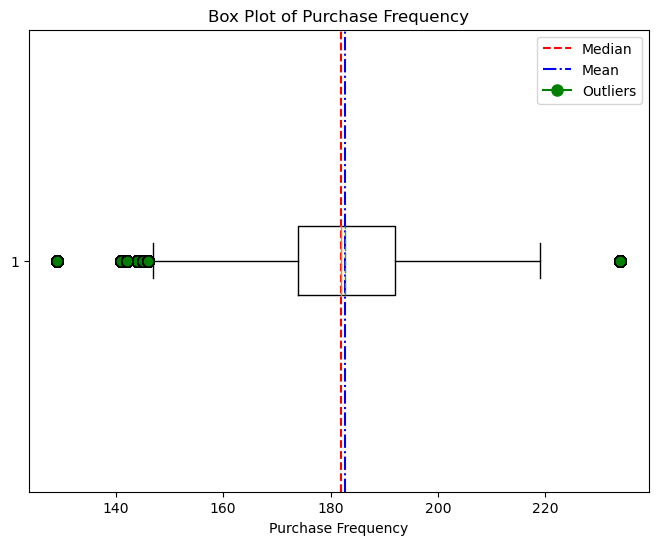

In [19]:
# Calculate mean and median for Purchase_Frequency
purchase_frequency_mean = customer_sales_df['Purchase_Frequency'].mean()
purchase_frequency_median = customer_sales_df['Purchase_Frequency'].median()

# Create a box plot for 'Purchase_Frequency' with mean, median, and outliers
plt.figure(figsize=(8, 6))
box = plt.boxplot(customer_sales_df['Purchase_Frequency'], vert=False, showmeans=True, 
                  meanline=True, showcaps=True, showbox=True, flierprops=dict(marker='o', markerfacecolor='g', markersize=8))
plt.axvline(purchase_frequency_median, color='r', linestyle='--', label='Median')
plt.axvline(purchase_frequency_mean, color='blue', linestyle='-.', label='Mean')

# Create custom legend entries for mean, median, and outliers
legend_entries = [plt.Line2D([0], [0], color='r', linestyle='--', label='Median'),
                  plt.Line2D([0], [0], color='blue', linestyle='-.', label='Mean'),
                  plt.Line2D([0], [0], marker='o', color='green', label='Outliers', markerfacecolor='green', markersize=8)]
plt.legend(handles=legend_entries)

plt.title('Box Plot of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.show()

### Create 'Total_Spent_byCustomer' Column

In [20]:
# Calculate total spending for each customer by summing up their 'TotalPrice'
total_spending = customer_sales_df.groupby('CustomerID')['TotalPrice'].sum().rename('Total_Spent_byCustomer')

# Merge the total spending information back into the original DataFrame
customer_sales_df = pd.merge(customer_sales_df, total_spending, on='CustomerID', how='left')

# Change negative values to positive in total spending
customer_sales_df['Total_Spent_byCustomer'] = customer_sales_df['Total_Spent_byCustomer'].abs()

In [21]:
# Describe the 'Total_Spent_byCustomer' column to get statistics including min, max, and quartiles
total_spending_description = customer_sales_df['Total_Spent_byCustomer'].describe()

# Extract relevant statistics
total_spending_min = total_spending_description['min']
total_spending_max = total_spending_description['max']
total_spending_quartiles = total_spending_description[['25%', '50%', '75%']]

# Display the results
print("Minimum Total Spending by Customer:", total_spending_min)
print("Maximum Total Spending by Customer:", total_spending_max)
print("Total Spending by Customer Quartiles:")
print(total_spending_quartiles)


Minimum Total Spending by Customer: 4.80000000000015
Maximum Total Spending by Customer: 172053.62
Total Spending by Customer Quartiles:
25%    3129.13
50%    3578.87
75%    4189.65
Name: Total_Spent_byCustomer, dtype: float64


### Check for Central Tendancy and Outliers

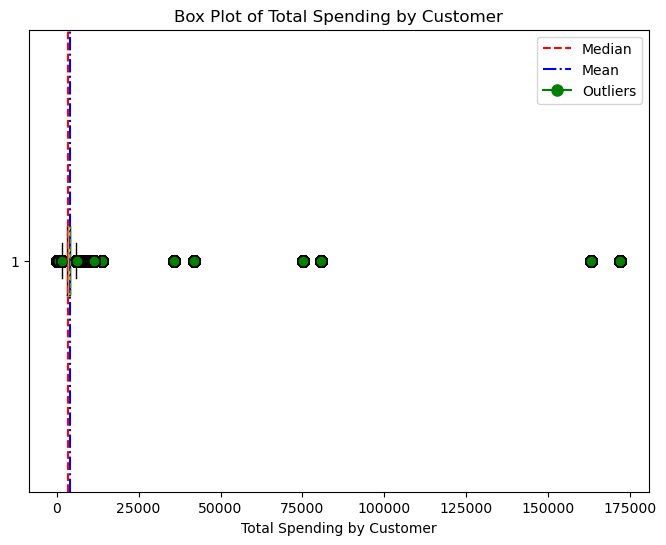

In [22]:
# Calculate mean and median for Total_Spent_byCustomer
total_spending_mean = customer_sales_df['Total_Spent_byCustomer'].mean()
total_spending_median = customer_sales_df['Total_Spent_byCustomer'].median()

# Create a box plot for 'Total_Spent_byCustomer' with mean, median, and outliers
plt.figure(figsize=(8, 6))
box = plt.boxplot(customer_sales_df['Total_Spent_byCustomer'], vert=False, showmeans=True, 
                  meanline=True, showcaps=True, showbox=True, flierprops=dict(marker='o', markerfacecolor='g', markersize=8))
plt.axvline(total_spending_median, color='r', linestyle='--', label='Median')
plt.axvline(total_spending_mean, color='blue', linestyle='-.', label='Mean')

# Create custom legend entries for mean, median, and outliers
legend_entries = [plt.Line2D([0], [0], color='r', linestyle='--', label='Median'),
                  plt.Line2D([0], [0], color='blue', linestyle='-.', label='Mean'),
                  plt.Line2D([0], [0], marker='o', color='green', label='Outliers', markerfacecolor='green', markersize=8)]
plt.legend(handles=legend_entries)

plt.title('Box Plot of Total Spending by Customer')
plt.xlabel('Total Spending by Customer')
plt.show()

### Create 'SpendingCategory' column based on 'Total_Spent_byCustomer' Column

In [23]:
# Define spending brackets based on the observed range of total spending
spending_bins = [0, 1000, 5000, 10000, float('inf')]
spending_labels = ['Low', 'Medium', 'High', 'Very High']

# Categorize total spending into spending brackets
customer_sales_df['SpendingCategory'] = pd.cut(customer_sales_df['Total_Spent_byCustomer'], bins=spending_bins, labels=spending_labels)


In [24]:
# Display count of each unique value in the 'SpendingCategory' column
spending_category_counts = customer_sales_df['SpendingCategory'].value_counts()

# Display the counts
print("Count of Each Spending Category:")
print(spending_category_counts)


Count of Each Spending Category:
SpendingCategory
Medium       361859
High          41435
Very High      2039
Low            1496
Name: count, dtype: int64


### Check for Central Tendancy

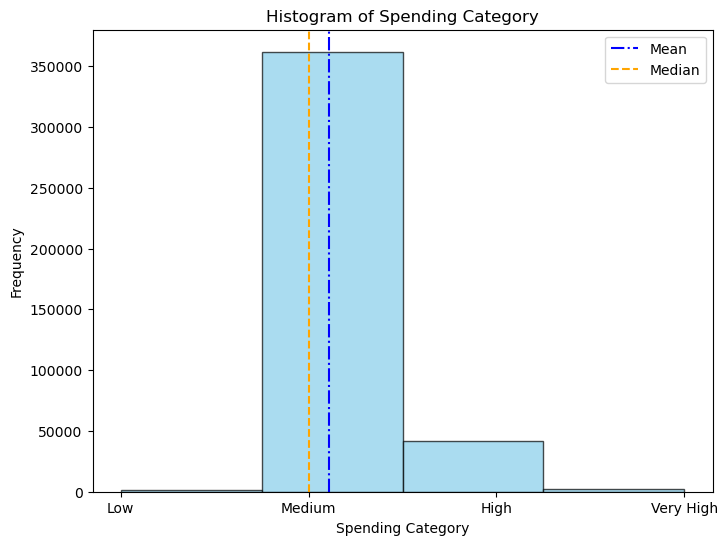

In [25]:
# Encode spending categories numerically
spending_category_numeric = customer_sales_df['SpendingCategory'].cat.codes

# Calculate mean and median for encoded spending categories
spending_category_mean = spending_category_numeric.mean()
spending_category_median = spending_category_numeric.median()

# Create a histogram for encoded spending categories
plt.figure(figsize=(8, 6))
plt.hist(spending_category_numeric, bins=len(spending_labels), color='skyblue', edgecolor='black', alpha=0.7)

# Add markers for mean and median
plt.axvline(spending_category_mean, color='blue', linestyle='-.', label='Mean')
plt.axvline(spending_category_median, color='orange', linestyle='--', label='Median')

# Set x-axis ticks and labels
plt.xticks(range(len(spending_labels)), spending_labels)

plt.title('Histogram of Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Frequency')

plt.legend()
plt.show()

### Create 'IncomeLevel' column based on 'Income' Column

In [26]:
# Define income brackets
income_bins = [0, 30000, 60000, 90000, float('inf')]
income_labels = ['Low', 'Medium', 'High', 'Very High']

# Categorize customers into income brackets
customer_sales_df['IncomeLevel'] = pd.cut(customer_sales_df['Income'], bins=income_bins, labels=income_labels)


In [27]:
# Display count of each unique value in the 'IncomeLevel' column
income_level_counts = customer_sales_df['IncomeLevel'].value_counts()

# Display the counts
print("Count of Each Income Level:")
print(income_level_counts)


Count of Each Income Level:
IncomeLevel
Very High    358896
High          18689
Medium        15741
Low           13503
Name: count, dtype: int64


### Check for Central Tendancy

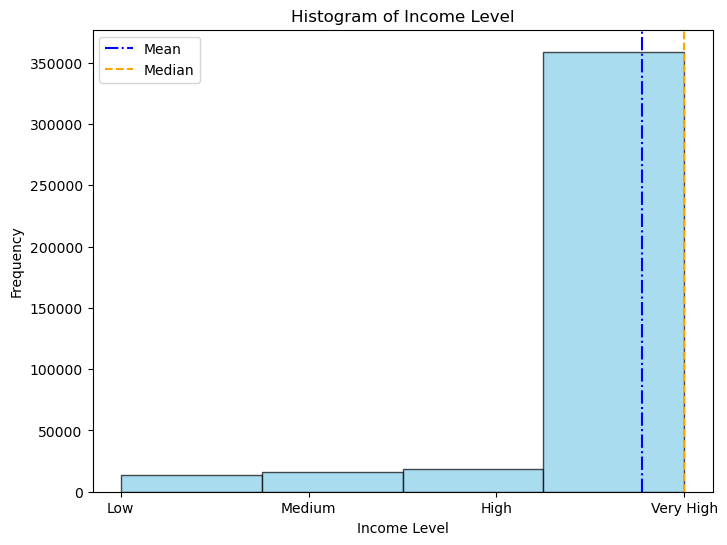

In [28]:
# Calculate mean and median for 'IncomeLevel'
income_level_mean = customer_sales_df['IncomeLevel'].cat.codes.mean()
income_level_median = customer_sales_df['IncomeLevel'].cat.codes.median()

# Create a histogram for 'IncomeLevel' with original category labels on x-axis
plt.figure(figsize=(8, 6))
plt.hist(customer_sales_df['IncomeLevel'].cat.codes, bins=len(income_labels), color='skyblue', edgecolor='black', alpha=0.7)

# Add markers for mean and median
plt.axvline(income_level_mean, color='blue', linestyle='-.', label='Mean')
plt.axvline(income_level_median, color='orange', linestyle='--', label='Median')

# Set x-axis ticks and labels
plt.xticks(range(len(income_labels)), income_labels)

plt.title('Histogram of Income Level')
plt.xlabel('Income Level')
plt.ylabel('Frequency')

plt.legend()
plt.show()

### Create 'Purchase_Recency' Column

In [29]:
# Group by 'CustomerID' and find distinct invoice dates for each customer
distinct_purchase_dates = customer_sales_df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: x.max().normalize())

# Calculate the current date
current_date = pd.Timestamp.now().normalize()  # Normalizing to remove timestamp

# Calculate the difference between the current date and the latest purchase date to get recency
purchase_recency = (current_date - distinct_purchase_dates).dt.days

# Create the 'Purchase_Recency' column
customer_sales_df['Purchase_Recency'] = customer_sales_df['CustomerID'].map(purchase_recency)

# Convert numerical recency to datetime format
customer_sales_df['Purchase_Recency_Date'] = current_date - pd.to_timedelta(customer_sales_df['Purchase_Recency'], unit='D')

# Remove the time component from the 'Purchase_Recency_Date' column
customer_sales_df['Purchase_Recency_Date'] = customer_sales_df['Purchase_Recency_Date'].dt.date

In [30]:
# Count the number of unique dates in the 'Purchase_Recency_Date' column
unique_purchase_recency_dates_count = customer_sales_df['Purchase_Recency_Date'].nunique()

# Display the count
print("Count of Unique Purchase Recency Dates:", unique_purchase_recency_dates_count)

Count of Unique Purchase Recency Dates: 8


## Drop unwanted columns

In [31]:
columns_to_remove = ['first_name', 'last_name', 'title', 'job_title', 'Country' , 'Year_Birth', 'email', 'company_name', 'university', 'linkedin_skill', 
                    'latitude', 'longitude', 'Income', 'phone', 'city', 'country', 'country_code', 'street_address', 
                     'street_name', 'street_number', 'street_suffix', 'ip_address', 'time_zone', 'InvoiceNo', 'StockCode', 
                    'Description', 'InvoiceDate', 'UnitPrice', 'TotalPrice', 'Purchase_Recency', 'Quantity', 'Purchase_Recency_Date', 
                     'department', 'job_category', 'language',]

# Drop the specified columns
customer_sales_df.drop(columns=columns_to_remove, inplace=True)

## Check number of unique values in each column 

In [32]:
# Check unique values in each column
unique_counts = customer_sales_df.nunique()
print(unique_counts)

CustomerID                2216
gender                       8
Education                    5
Kidhome                      3
Marital_Status               8
Teenhome                     3
region                       7
Purchase_Frequency          80
Age                         57
Total_Spent_byCustomer    2211
SpendingCategory             4
IncomeLevel                  4
dtype: int64


In [33]:
# Display Shape
customer_sales_df.shape

(406829, 12)

## Encode Categorical Features for Further Analysis

In [34]:
# Define the columns to encode
columns_to_encode = ['gender', 'Education',  'Marital_Status', 'Kidhome', 'Teenhome', 'region', 'SpendingCategory', 
                     'IncomeLevel']

# Perform One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False)
coded_customer_sales_df = pd.get_dummies(customer_sales_df, columns=columns_to_encode)

# Display Shape
coded_customer_sales_df.shape

(406829, 46)

In [35]:
coded_customer_sales_df.dtypes

CustomerID                      int64
Purchase_Frequency              int64
Age                             int64
Total_Spent_byCustomer        float64
gender_Agender                   bool
gender_Bigender                  bool
gender_Female                    bool
gender_Genderfluid               bool
gender_Genderqueer               bool
gender_Male                      bool
gender_Non-binary                bool
gender_Polygender                bool
Education_2n Cycle               bool
Education_Basic                  bool
Education_Graduation             bool
Education_Master                 bool
Education_PhD                    bool
Marital_Status_Absurd            bool
Marital_Status_Alone             bool
Marital_Status_Divorced          bool
Marital_Status_Married           bool
Marital_Status_Single            bool
Marital_Status_Together          bool
Marital_Status_Widow             bool
Marital_Status_YOLO              bool
Kidhome_0                        bool
Kidhome_1   

In [36]:
# Convert boolean columns to integers (0 or 1)
bool_columns = coded_customer_sales_df.select_dtypes(include=[bool]).columns
coded_customer_sales_df[bool_columns] = coded_customer_sales_df[bool_columns].astype('float64')

# Check the updated data types
print(coded_customer_sales_df.dtypes)


CustomerID                      int64
Purchase_Frequency              int64
Age                             int64
Total_Spent_byCustomer        float64
gender_Agender                float64
gender_Bigender               float64
gender_Female                 float64
gender_Genderfluid            float64
gender_Genderqueer            float64
gender_Male                   float64
gender_Non-binary             float64
gender_Polygender             float64
Education_2n Cycle            float64
Education_Basic               float64
Education_Graduation          float64
Education_Master              float64
Education_PhD                 float64
Marital_Status_Absurd         float64
Marital_Status_Alone          float64
Marital_Status_Divorced       float64
Marital_Status_Married        float64
Marital_Status_Single         float64
Marital_Status_Together       float64
Marital_Status_Widow          float64
Marital_Status_YOLO           float64
Kidhome_0                     float64
Kidhome_1   

## Apply Normalization

In [37]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns for scaling
numerical_columns = ['Purchase_Frequency', 'Age', 'Total_Spent_byCustomer']

# Apply Min-Max scaling to the selected numerical columns
normalized_numerical_df = pd.DataFrame(scaler.fit_transform(coded_customer_sales_df[numerical_columns]), 
                                       columns=numerical_columns)

# Concatenate the one-hot encoded DataFrame with the normalized numerical DataFrame
normal_cust_sales_df = pd.concat([coded_customer_sales_df.drop(columns=numerical_columns), normalized_numerical_df], axis=1)

# Display Shape
print(normal_cust_sales_df.shape)

(406829, 46)


In [38]:
normal_cust_sales_df.columns

Index(['CustomerID', 'gender_Agender', 'gender_Bigender', 'gender_Female',
       'gender_Genderfluid', 'gender_Genderqueer', 'gender_Male',
       'gender_Non-binary', 'gender_Polygender', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Kidhome_0', 'Kidhome_1',
       'Kidhome_2', 'Teenhome_0', 'Teenhome_1', 'Teenhome_2', 'region_Africa',
       'region_Asia', 'region_Central America', 'region_Europe',
       'region_North America', 'region_Oceania', 'region_South America',
       'SpendingCategory_Low', 'SpendingCategory_Medium',
       'SpendingCategory_High', 'SpendingCategory_Very High',
       'IncomeLevel_Low', 'IncomeLevel_Medium', 'IncomeLevel_High',
       'IncomeLevel_Very High', 'Purchase

## Split Dataset

In [39]:
train_df, test_val_df = train_test_split(normal_cust_sales_df, test_size=0.3, random_state=42)
validate_df, test_df = train_test_split(test_val_df, test_size=0.5, random_state=42)

## Begin Training Model

In [40]:
train_df.head()

,CustomerID,gender_Agender,gender_Bigender,gender_Female,gender_Genderfluid,gender_Genderqueer,gender_Male,gender_Non-binary,gender_Polygender,Education_2n Cycle,...,SpendingCategory_Medium,SpendingCategory_High,SpendingCategory_Very High,IncomeLevel_Low,IncomeLevel_Medium,IncomeLevel_High,IncomeLevel_Very High,Purchase_Frequency,Age,Total_Spent_byCustomer
347138,7093,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.323810,0.803571,0.018092
355578,6544,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.476190,0.964286,0.017399
258902,5031,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.504762,0.892857,0.020113
117130,2975,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.580952,0.785714,0.018998
64221,10175,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.419048,0.875000,0.019633


In [41]:
train_df.columns

Index(['CustomerID', 'gender_Agender', 'gender_Bigender', 'gender_Female',
       'gender_Genderfluid', 'gender_Genderqueer', 'gender_Male',
       'gender_Non-binary', 'gender_Polygender', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Kidhome_0', 'Kidhome_1',
       'Kidhome_2', 'Teenhome_0', 'Teenhome_1', 'Teenhome_2', 'region_Africa',
       'region_Asia', 'region_Central America', 'region_Europe',
       'region_North America', 'region_Oceania', 'region_South America',
       'SpendingCategory_Low', 'SpendingCategory_Medium',
       'SpendingCategory_High', 'SpendingCategory_Very High',
       'IncomeLevel_Low', 'IncomeLevel_Medium', 'IncomeLevel_High',
       'IncomeLevel_Very High', 'Purchase

In [42]:
# Set the variance threshold
variance_threshold = 0.2

# Create a VarianceThreshold object
selector = VarianceThreshold(threshold=variance_threshold)

# Fit the selector to the data 
selector.fit(train_df)

# Get the support mask 
support = selector.get_support(indices=True)

# Select features based on the support mask
reduced_features = train_df.iloc[:, support]  

# Now 'reduced_features' is a DataFrame containing features with variance exceeding the threshold
print(f"Number of features removed: {len(train_df.columns) - len(reduced_features.columns)}")

Number of features removed: 35


In [43]:
reduced_features.shape

(284780, 11)

## Model Training with KMeans Algorithm

In [44]:
# Convert DataFrame to NumPy array (excluding CustomerID)
features_np = reduced_features.values.astype('float32')

# Define hyperparameters for KMeans model
hyperparameters = {'k': 4}

# Set k value
k_value = hyperparameters['k']

# Create KMeans model
kmeans = KMeans(n_clusters=k_value, init='random', n_init=10, random_state=42)

# Fit the model
print(f"Training model for k={k_value}...")
kmeans.fit(features_np)

# Get cluster labels
cluster_labels = kmeans.labels_

# Print centroids
print("Centroids:")
print(kmeans.cluster_centers_)

print(f"Model for k={k_value} trained.")



Training model for k=4...
Centroids:
[[4.1465742e+03 4.7082281e-01 4.3089211e-01 3.1956270e-01 3.4503588e-01
  3.3540004e-01 3.2611731e-01 3.4227261e-01 3.3160895e-01 4.6384072e-01
  2.6941147e-01]
 [9.8366533e+03 4.7355902e-01 4.1839641e-01 3.2117248e-01 2.9221880e-01
  3.8660467e-01 3.4706652e-01 3.2813215e-01 3.2480186e-01 4.7084340e-01
  3.0387595e-01]
 [6.8464258e+03 4.6741953e-01 4.5193154e-01 3.7151411e-01 3.3177927e-01
  2.9670939e-01 3.3845240e-01 3.5417634e-01 3.0737326e-01 4.8706138e-01
  2.8564742e-01]
 [1.3846235e+03 4.5889139e-01 4.4426391e-01 3.3011496e-01 3.5056761e-01
  3.1931403e-01 3.3540079e-01 3.3975640e-01 3.2484305e-01 4.4949427e-01
  2.9273853e-01]]
Model for k=4 trained.


## Model Validation

In [45]:
validate_df.head()

,CustomerID,gender_Agender,gender_Bigender,gender_Female,gender_Genderfluid,gender_Genderqueer,gender_Male,gender_Non-binary,gender_Polygender,Education_2n Cycle,...,SpendingCategory_Medium,SpendingCategory_High,SpendingCategory_Very High,IncomeLevel_Low,IncomeLevel_Medium,IncomeLevel_High,IncomeLevel_Very High,Purchase_Frequency,Age,Total_Spent_byCustomer
39656,5491,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.428571,0.482143,0.021399
154962,11039,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.561905,0.785714,0.020732
282535,1030,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.400000,0.642857,0.021919
79931,10562,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571,0.857143,0.024075
148926,2499,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.219048,0.017857,0.079834


### Dimensionality Reduction using Variance 

In [46]:
# Set the variance threshold
variance_threshold = 0.2

# Create a VarianceThreshold object
selector = VarianceThreshold(threshold=variance_threshold)

# Fit the selector to the data
selector.fit(validate_df)

# Get the support mask
support = selector.get_support(indices=True)

# Select features based on the support mask
reduced_features_validate = validate_df.iloc[:, support]  

# Now 'reduced_features' is a DataFrame containing features with variance exceeding the threshold
print(f"Number of features removed: {len(validate_df.columns) - len(reduced_features_validate.columns)}")

Number of features removed: 35


In [47]:
reduced_features_validate.shape

(61024, 11)

In [48]:
# Show the reduced_features_validate DataFrame
print("Reduced Features DataFrame:")
reduced_features_validate.head()

Reduced Features DataFrame:


,CustomerID,gender_Female,gender_Male,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,region_Asia,region_Europe
39656,5491,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
154962,11039,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
282535,1030,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
79931,10562,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
148926,2499,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
# Convert DataFrame to NumPy array 
features_np_validate = reduced_features_validate.values.astype('float32')

# Predict clusters for Validation data
cluster_predictions = kmeans.predict(features_np_validate)

In [50]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(features_np_validate, cluster_predictions)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5762211084365845


In [51]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin index
db_index = davies_bouldin_score(features_np_validate, cluster_predictions)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.49986887043287886


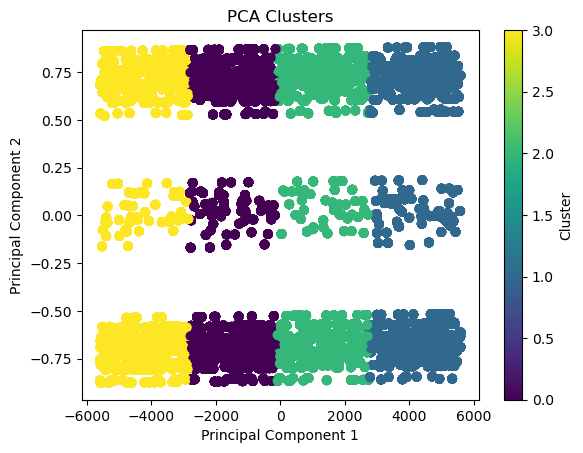

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_np_validate)

# Plot clusters
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_predictions, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clusters')
plt.colorbar(label='Cluster')
plt.show()


In [53]:
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame to show centroids
centroid_df = pd.DataFrame(centroids, columns=reduced_features_validate.columns)
print("Cluster Centroids:")
print(centroid_df)


Cluster Centroids:
    CustomerID  gender_Female  gender_Male  Kidhome_0  Kidhome_1  Kidhome_2  \
0  4146.574219       0.470823     0.430892   0.319563   0.345036   0.335400   
1  9836.653320       0.473559     0.418396   0.321172   0.292219   0.386605   
2  6846.425781       0.467420     0.451932   0.371514   0.331779   0.296709   
3  1384.623535       0.458891     0.444264   0.330115   0.350568   0.319314   

   Teenhome_0  Teenhome_1  Teenhome_2  region_Asia  region_Europe  
0    0.326117    0.342273    0.331609     0.463841       0.269411  
1    0.347067    0.328132    0.324802     0.470843       0.303876  
2    0.338452    0.354176    0.307373     0.487061       0.285647  
3    0.335401    0.339756    0.324843     0.449494       0.292739  


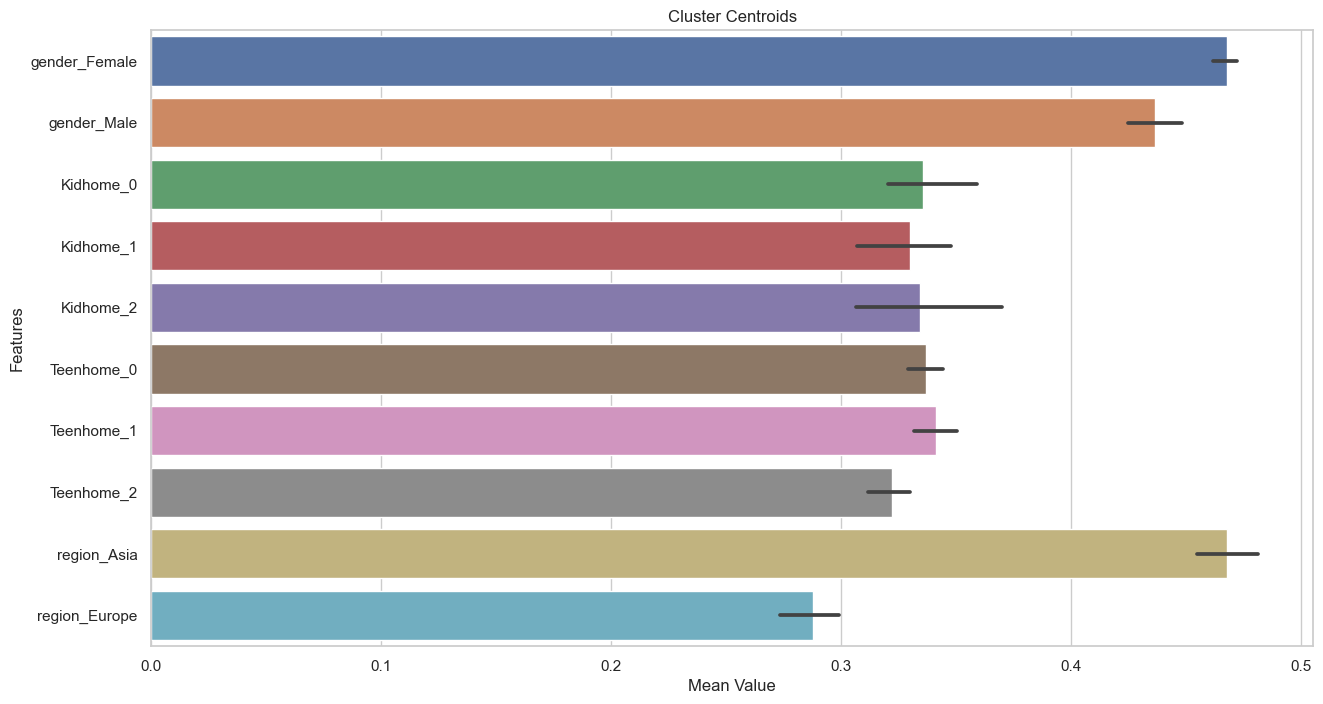

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'CustomerID' column for visualization
centroid_df_plot = centroid_df.drop(columns=['CustomerID'])

# Set the style
sns.set(style="whitegrid")

# Plot the centroids using a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=centroid_df_plot, orient='h')
plt.title('Cluster Centroids')
plt.xlabel('Mean Value')
plt.ylabel('Features')
plt.show()


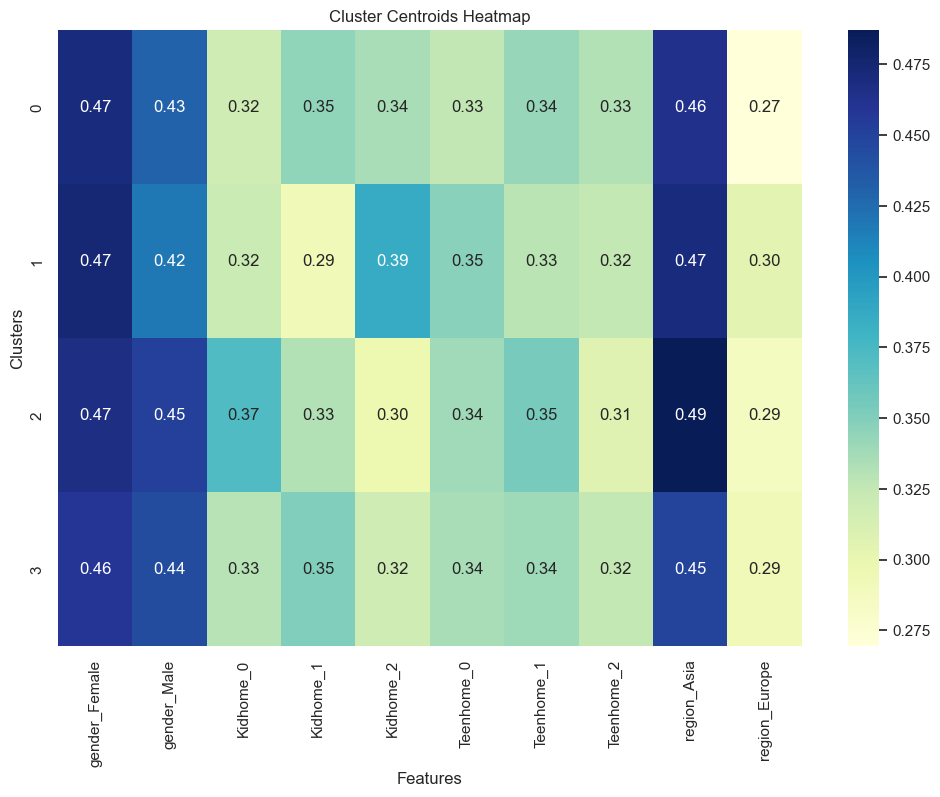

In [55]:
# Drop the 'CustomerID' column for visualization
centroid_df_heatmap = centroid_df.drop(columns=['CustomerID'])

# Plot the centroids using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(centroid_df_heatmap, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Cluster Centroids Heatmap')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()
